In [2]:
import html2text

In [3]:
text_maker = html2text.HTML2Text()
text_maker.ignore_links = True
text_maker.ignore_images = True
text_maker.unicode_snob = True

In [4]:
base_folder = '/home/ilya/hard_drive/mirror/lib.ru/files/full/extracted/'

with open(base_folder + 'pushkin_a_s-text_0426.fb2', 'r') as content_file:
    content = content_file.read()

In [5]:
print(content)

<?xml version="1.0" encoding="utf-8"?>
<FictionBook xmlns="http://www.gribuser.ru/xml/fictionbook/2.1" xmlns:genre="http://www.gribuser.ru/xml/fictionbook/2.1/genres" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xs="http://www.w3.org/2001/XMLSchema">
<description>
	<title-info>
		<genre>sf</genre>
		<author>
			<first-name>Александр</first-name>
			<middle-name>Сергеевич</middle-name>
			<last-name>Пушкин</last-name>
		</author>
		<book-title>Пиковая дама</book-title>
<annotation></annotation>		<date value="2010-01-14">14/01/2010</date>
		<lang>ru</lang>
	</title-info>
	<document-info>
		<author>
			<nickname>samlib.ru</nickname>
			<home-page>http://samlib.ru/</home-page>
		</author>
		<program-used>samlib.ru</program-used>
		<date value="2017-04-17">2017-04-17 06:53:40</date>
		<src-url>http://az.lib.ru/p/pushkin_a_s/text_0426.shtml</src-url>
		<id>samlib58f4e5046ff025.16134552</id>
		<version>1.0</version>
	</document-info>
</description>
<body>
<title>
	<p>Пушкин Александр Серг

In [6]:
text = text_maker.handle(content)

In [7]:
print(text)

sf Александр Сергеевич Пушкин Пиковая дама 14/01/2010 ru samlib.ru
http://samlib.ru/ samlib.ru 2017-04-17 06:53:40
http://az.lib.ru/p/pushkin_a_s/text_0426.shtml samlib58f4e5046ff025.16134552
1.0

Пушкин Александр Сергеевич

Пиковая дама

**Александр Сергеевич Пушкин**

**Пиковая дама**

Источник текста: Собрание сочинений А.С. Пушкина в десяти томах. М.: ГИХЛ,
1960, том 5.

Оригинал здесь: Русская виртуальная библиотека.

**ПИКОВАЯ ДАМА**

Пиковая дама означает тайную недоброжелательность.

Новейшая гадательная книга.

**I**

А в ненастные дни

Собирались они

Часто;

Гнули -- бог их прости! --

От пятидесяти

На сто,

И выигрывали,

И отписывали

Мелом.

Так, в ненастные дни,

Занимались они

Делом.

Однажды играли в карты у конногвардейца Нарумова. Долгая зимняя ночь прошла
незаметно; сели ужинать в пятом часу утра. Те, которые остались в выигрыше,
ели с большим аппетитом, прочие, в рассеянности, сидели перед пустыми своими
приборами. Но шампанское явилось, разговор оживился, и все 

In [79]:
import string
exclude = set(string.punctuation)
exclude.remove('.')
exclude.remove('!')
exclude.remove('?')
text = text.replace('--', '.')
converted = ''.join(ch for ch in text if ch not in exclude)
converted = converted.splitlines()
print(len(converted))
converted = [s for s in converted if len(s) > 0]
converted = converted[20::]
converted = converted[:len(converted) - 55]
converted_text = ' '.join(converted)

1075


In [78]:
print(converted_text)

На сто И выигрывали И отписывали Мелом. Так в ненастные дни Занимались они Делом. Однажды играли в карты у конногвардейца Нарумова. Долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра. Те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами. Но шампанское явилось разговор оживился и все приняли в нем участие.  Что ты сделал Сурин?  спросил хозяин.  Проиграл по обыкновению. Надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь!  И ты ни разу не соблазнился? ни разу не поставил на руте?.. Твердость твоя для меня удивительна.  А каков Германн!  сказал один из гостей указывая на молодого инженера  отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру!  Игра занимает меня сильно  сказал Германн  но я не в состоянии жертвовать необходимым в надежде приобрести излишнее.  Германн немец он рас

In [80]:
import re

def is_cyrillic(sym):
    return 'а' <= sym and sym <= 'я'

by_sant = re.split('[.!?]+', converted_text.lower())
by_sant = [s.strip() for s in by_sant if len(s) > 0]
by_sant = [''.join(sym for sym in s if is_cyrillic(sym) or sym ==' ') for s in by_sant]
by_sant = [' '.join(re.split('\W+', s)) for s in by_sant]

In [77]:
print(by_sant)

['на сто и выигрывали и отписывали мелом', 'так в ненастные дни занимались они делом', 'однажды играли в карты у конногвардейца нарумова', 'долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра', 'те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами', 'но шампанское явилось разговор оживился и все приняли в нем участие', 'что ты сделал сурин', 'спросил хозяин', 'проиграл по обыкновению', 'надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь', 'и ты ни разу не соблазнился', 'ни разу не поставил на руте', 'твердость твоя для меня удивительна', 'а каков германн', 'сказал один из гостей указывая на молодого инженера отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру', 'игра занимает меня сильно сказал германн но я не в состоянии жертвовать необходимым в надежде приобрести излишнее', 

In [33]:
total_avg = sum( map(len, by_sant) ) / len(by_sant)
print(total_avg)

61.452312138728324


In [34]:
sant_len = [len(s) for s in by_sant]
print(sant_len)

[38, 40, 48, 66, 114, 67, 19, 14, 23, 121, 27, 27, 35, 15, 168, 113, 36, 15, 72, 3, 3, 15, 75, 84, 31, 3, 12, 113, 126, 31, 78, 120, 61, 239, 67, 118, 177, 4, 16, 15, 27, 52, 73, 111, 210, 84, 61, 30, 56, 50, 130, 19, 148, 41, 72, 62, 61, 31, 44, 51, 148, 108, 6, 21, 6, 15, 30, 16, 30, 3, 116, 14, 181, 77, 139, 17, 89, 121, 52, 125, 40, 71, 9, 2, 3, 17, 52, 23, 99, 224, 51, 43, 3, 19, 10, 89, 56, 16, 6, 41, 23, 11, 18, 48, 58, 13, 49, 55, 78, 61, 6, 26, 76, 51, 46, 26, 69, 26, 30, 31, 8, 13, 3, 23, 7, 7, 3, 10, 33, 41, 0, 97, 8, 91, 27, 23, 26, 27, 32, 17, 26, 39, 26, 74, 74, 88, 39, 68, 56, 15, 12, 17, 30, 6, 43, 63, 6, 27, 17, 19, 9, 15, 10, 32, 44, 6, 15, 20, 21, 34, 2, 41, 15, 40, 41, 15, 57, 17, 41, 20, 28, 57, 54, 26, 18, 38, 43, 16, 15, 13, 9, 14, 15, 13, 27, 11, 18, 25, 17, 16, 13, 15, 44, 15, 26, 58, 139, 185, 294, 82, 125, 41, 199, 144, 36, 188, 282, 215, 295, 114, 127, 14, 88, 35, 112, 71, 96, 86, 168, 98, 47, 123, 167, 31, 99, 124, 67, 151, 111, 108, 302, 98, 107, 37, 38, 1

(array([ 1.,  0.,  0.,  0.,  3.,  0., 10.,  0.,  2.,  0.,  2.,  0.,  0.,
         7.,  0.,  4.,  0.,  5.,  0.,  4.,  0.,  8.,  0.,  7.,  0.,  0.,
         3.,  0., 14.,  0., 10.,  0., 20.,  0.,  6.,  0., 11.,  0.,  0.,
        12.,  0., 19.,  0.,  6.,  0.,  4.,  0.,  6.,  0.,  0., 10.,  0.,
         4.,  0.,  7.,  0., 14.,  0., 11.,  0.,  5.,  0.,  0.,  4.,  0.,
        13.,  0., 16.,  0.,  6.,  0.,  6.,  0.,  4.,  0.,  0., 13.,  0.,
         5.,  0.,  1.,  0.,  7.,  0.,  4.,  0.,  0., 10.,  0., 11.,  0.,
         8.,  0.,  8.,  0.,  7.,  0.,  4.,  0.,  0.,  8.,  0.,  4.,  0.,
         5.,  0.,  4.,  0.,  3.,  0.,  6.,  0.,  0.,  6.,  0.,  7.,  0.,
         3.,  0.,  7.,  0.,  8.,  0.,  0.,  6.,  0.,  7.,  0.,  3.,  0.,
         4.,  0.,  5.,  0.,  4.,  0.,  0.,  3.,  0.,  6.,  0.,  6.,  0.,
         3.,  0.,  8.,  0.,  2.,  0.,  0.,  5.,  0.,  6.,  0.,  5.,  0.,
         4.,  0.,  3.,  0.,  0., 10.,  0.,  2.,  0.,  3.,  0.,  5.,  0.,
         3.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,  0.

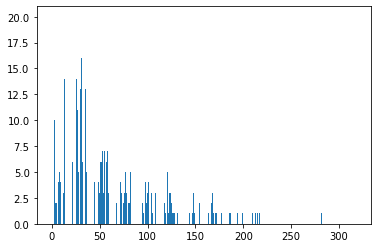

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(sant_len, len(sant_len))

In [45]:
for s in by_sant:
    if len(s) > 230:
        print(s)
        print()

он ее боялся как огня однако услышав о таком ужасном проигрыше он вышел из себя принес счеты доказал ей что в полгода они издержали полмиллиона что под парижем нет у них ни подмосковной ни саратовской деревни и начисто отказался от платежа

она участвовала во всех суетностях большого света таскалась на балы где сидела в углу разрумяненная и одетая по старинной моде как уродливое и необходимое украшение бальной залы к ней с низкими поклонами подходили приезжающие гости как по установленному обряду и потом уже никто ею не занимался

она была самолюбива живо чувствовала свое положение и глядела кругом себя с нетерпением ожидая избавителя но молодые люди расчетливые в ветреном своем тщеславии не удостоивали ее внимания хотя лизавета ивановна была сто раз милее наглых и холодных невест около которых они увивались

однажды это случилось два дня после вечера описанного в начале этой повести и за неделю перед той сценой на которой мы остановились однажды лизавета ивановна сидя под окошком за п

In [72]:
def char2num(sym):
    if sym == ' ':
        return 2000
    return int.from_bytes(sym.encode('utf8'), byteorder='big') - int.from_bytes('а'.encode('utf8'), byteorder='big')

def num2char(num):
    if num == 2000:
        return ' '
    return (int.from_bytes('а'.encode('utf8'), byteorder='big') + num).to_bytes(2, byteorder='big').decode('utf8')

sant_num = [[char2num(ch) for ch in s] for s in by_sant]
sant_from_num = [''.join([num2char(num) for num in ar]) for ar in sant_num]

In [61]:
print(sant_from_num)

['на сто и выигрывали и отписывали мелом', 'так в ненастные дни занимались они делом', 'однажды играли в карты у конногвардейца нарумова', 'долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра', 'те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами', 'но шампанское явилось разговор оживился и все приняли в нем участие', 'что ты сделал сурин', 'спросил хозяин', 'проиграл по обыкновению', 'надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь', 'и ты ни разу не соблазнился', 'ни разу не поставил на руте', 'твердость твоя для меня удивительна', 'а каков германн', 'сказал один из гостей указывая на молодого инженера отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру', 'игра занимает меня сильно сказал германн но я не в состоянии жертвовать необходимым в надежде приобрести излишнее', 

In [62]:
print(sant_num)

[[13, 0, 2000, 209, 210, 14, 2000, 8, 2000, 2, 219, 8, 3, 208, 219, 2, 0, 11, 8, 2000, 8, 2000, 14, 210, 15, 8, 209, 219, 2, 0, 11, 8, 2000, 12, 5, 11, 14, 12], [210, 0, 10, 2000, 2, 2000, 13, 5, 13, 0, 209, 210, 13, 219, 5, 2000, 4, 13, 8, 2000, 7, 0, 13, 8, 12, 0, 11, 8, 209, 220, 2000, 14, 13, 8, 2000, 4, 5, 11, 14, 12], [14, 4, 13, 0, 6, 4, 219, 2000, 8, 3, 208, 0, 11, 8, 2000, 2, 2000, 10, 0, 208, 210, 219, 2000, 211, 2000, 10, 14, 13, 13, 14, 3, 2, 0, 208, 4, 5, 9, 214, 0, 2000, 13, 0, 208, 211, 12, 14, 2, 0], [4, 14, 11, 3, 0, 223, 2000, 7, 8, 12, 13, 223, 223, 2000, 13, 14, 215, 220, 2000, 15, 208, 14, 216, 11, 0, 2000, 13, 5, 7, 0, 12, 5, 210, 13, 14, 2000, 209, 5, 11, 8, 2000, 211, 6, 8, 13, 0, 210, 220, 2000, 2, 2000, 15, 223, 210, 14, 12, 2000, 215, 0, 209, 211, 2000, 211, 210, 208, 0], [210, 5, 2000, 10, 14, 210, 14, 208, 219, 5, 2000, 14, 209, 210, 0, 11, 8, 209, 220, 2000, 2, 2000, 2, 219, 8, 3, 208, 219, 216, 5, 2000, 5, 11, 8, 2000, 209, 2000, 1, 14, 11, 220, 216, 8, 1

In [63]:
'а'.encode('utf8')

b'\xd0\xb0'

In [64]:
'я'.encode('utf8')

b'\xd1\x8f'

In [81]:
with open(base_folder + 'converted', 'a') as f:
    for sant in by_sant:
        s = sant.strip()
        if len(s) > 0:
            print(s, file=f)